# Investigating the Stroop Effect

This data set includes a sample of 24 people that each completed two sets of tasks.  Two collections of colored words were presented to each person and the number of seconds that it took to name the color ink of each word was recorded.  In one of the sets the color ink matched the written name of the color (congruent) and in the other they did not match (incongruent).

<img src="example_image.png">

In this experiment, the independent variable is the whether or not the ink of the words are in the color of their name (the condition of being congruent or incongruent).  The dependent variable is the time that the participants take to name the colors of the ink.

According to the Stroop Effect, the wrong written colors in the incongruent group of words consitutes interference and should result in increased reaction times for these tasks.  Using the samples provided, I am going to perform a statistical test to determine if the Stroop Effect is displayed in the completion of these tasks.

The null hypothesis ($H_0$) is that there there is no difference between the population's mean times to complete the congruent and incongruent tasks, and hence the times to complete both sets of tasks belong to the same population.  The alternative hypothesis ($H_A$) is that the population's mean reaction time for the incongruent tasks will be greater than that for the congruent tasks, and therefore that the differences in the population means are not by chance and that they belong to two different populations.

$$H_0:  \mu_c = \mu_i$$
$$H_A:  \mu_c < \mu_i$$

Where $\mu_c$ is the population mean completion time for the congruent task set and $\mu_i$ is the population mean completion time for the incongruent task set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as scst
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('stroopdata.csv')
print(data)

    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


In [3]:
# Include a column for the differences in the task times for each participant
data['Difference'] = data['Incongruent'] - data['Congruent']
print(data)

    Congruent  Incongruent  Difference
0      12.079       19.278       7.199
1      16.791       18.741       1.950
2       9.564       21.214      11.650
3       8.630       15.687       7.057
4      14.669       22.803       8.134
5      12.238       20.878       8.640
6      14.692       24.572       9.880
7       8.987       17.394       8.407
8       9.401       20.762      11.361
9      14.480       26.282      11.802
10     22.328       24.524       2.196
11     15.298       18.644       3.346
12     15.073       17.510       2.437
13     16.929       20.330       3.401
14     18.200       35.255      17.055
15     12.130       22.158      10.028
16     18.495       25.139       6.644
17     10.639       20.429       9.790
18     11.344       17.425       6.081
19     12.369       34.288      21.919
20     12.944       23.894      10.950
21     14.233       17.960       3.727
22     19.710       22.058       2.348
23     16.004       21.157       5.153


## Explore the data

In [4]:
n = len(data) # sample size
stats = data.describe()
print(stats)

       Congruent  Incongruent  Difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917    7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000    1.950000
25%    11.895250    18.716750    3.645500
50%    14.356500    21.017500    7.666500
75%    16.200750    24.051500   10.258500
max    22.328000    35.255000   21.919000


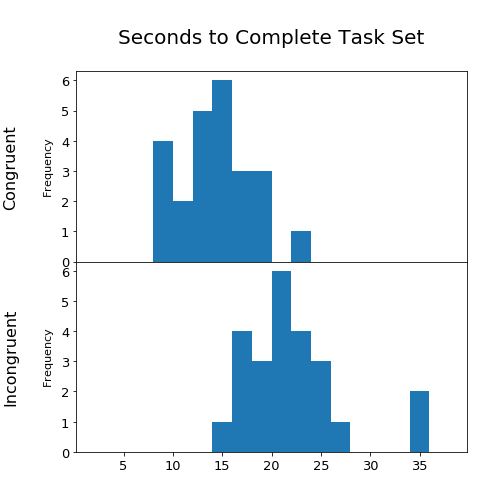

In [5]:
# Histograms of the data

fig, (ax1, ax2)  = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (7,7))

ax1 = plt.subplot(211)
bins = list(range(2, 40, 2))
plt.hist(data['Congruent'], bins=bins)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), fontsize=13)
plt.ylabel('Congruent\n\n$\\regular_{Frequency}$', fontsize=16)
plt.title("\nSeconds to Complete Task Set\n", fontsize=20)

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.hist(data['Incongruent'], bins=bins)
plt.setp(ax2.get_xticklabels(), fontsize=13)
plt.setp(ax2.get_yticklabels(), fontsize=13)
plt.ylabel('Incongruent\n\n$\\regular_{Frequency}$', fontsize=16)
plt.subplots_adjust(hspace=0)

plt.show()

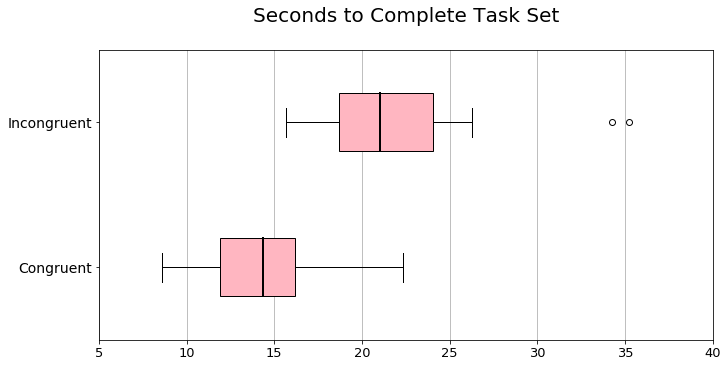

In [6]:
## Boxplots of the data

plt_data = np.array(data[['Congruent','Incongruent']])

fig, ax  = plt.subplots(1, 1, figsize = (11,7))

medianprops = dict(linestyle='-', linewidth=2, color='black')
bp = plt.boxplot(plt_data, vert=False, patch_artist=True, widths=(0.4, 0.4), \
                 labels=['Congruent','Incongruent'], medianprops=medianprops)

plt.grid('on', which='major', axis='x' )
plt.grid('off', which='major', axis='y' )
x1,x2,y1,y2 = plt.axis()
plt.axis((5,40,y1,y2))
plt.title('Seconds to Complete Task Set\n', fontsize=20)
plt.setp(ax.get_xticklabels(), fontsize=13)
plt.setp(ax.get_yticklabels(), fontsize=14)

for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(bp[element], color='black')

for patch in bp['boxes']:
    patch.set(facecolor='lightpink')       

plt.subplots_adjust(top=0.7)

plt.show()

### Summary of Plots
Both plots and the summary statistics clearly show that the reaction times for the incongruent set are typically greater than those for the congruent group; all statistics for the incongruent group, including the mean, median, minimum, and maximum, are greater than those of the congruent group.  Almost 75% of the congruent reaction times are faster than the slowest time for the incongruent set.
Both the plots show that the data for each group is approximately normally distributed.   The IQR for the congruent data set is slightly smaller than that of the incongruent as evidenced by the smaller sized box in the boxplots.  The incongruent also has two outliers, where the congruent has none.  However apart from these two outliers, the incongruent data set is slightly more closely clustered than the congruent (although they are both very similar in spread).

## Statistical Test

I will use a one-tailed t-test with dependent samples to determine if there is a statistically significant difference between these the means of these two samples.  I am choosing a t-test as my hypothesis test since in this case we only have samples from which to draw conclusions (i.e. the population parameters are not known) and the samples are also both small.

In using the t-test we are assuming that:
* the dependent variable is continuous
* the independent variable consists of two sets of matching pairs of data
* different observations of the dependent variable are independent of each other (i.e. each participant's performance is not affected by the performance of another)
* the dependent variable is approximately normally distributed in each group with both having the same variance
* there are no significant outliers in the differences group
    * Note: there is one outlier in the differences group (as evidenced by the histogram and boxplot below), but I have considered it to not be significant.  This may increase the likelihood that we retain the null hypothesis by increasing the standard deviation of this group.

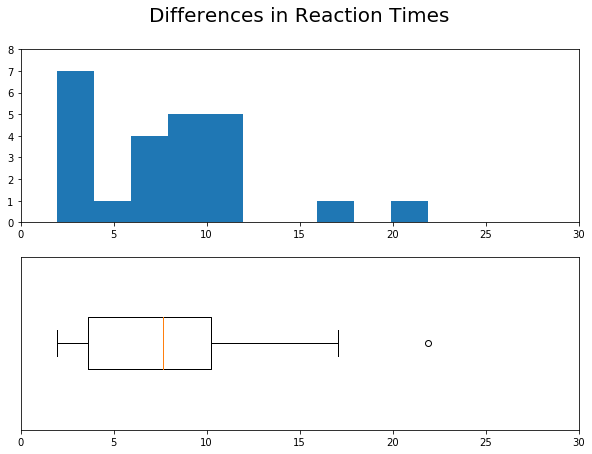

In [7]:
fig, (ax1, ax2)  = plt.subplots(2, 1, figsize=(10,7))

ax1 = plt.subplot(211)
plt.hist(data['Difference'])
plt.title('Differences in Reaction Times\n', fontsize=20)
plt.axis((0,30,0,8))

ax2 = plt.subplot(212, sharex=ax1)
plt.boxplot(data['Difference'], labels=[''],vert=False, widths=0.3)
x1,x2,y1,y2 = plt.axis()
plt.axis((0,30,y1,y2))
yticks = ax2.yaxis.get_major_ticks()
ax2.yaxis.set_ticks_position('none')

plt.show()

In [8]:
mean_diff = stats.loc['mean']['Difference']
print('Mean difference: {:.3f}'.format(mean_diff))

Mean difference: 7.965


In [9]:
df = n - 1
print('Degrees of freedom: {}'.format(df))

Degrees of freedom: 23


In [10]:
std_dev = stats.loc['std']['Difference']
std_err = std_dev/math.sqrt(n)
print('Standard Deviation: {:.3f}'.format(std_dev))
print('Standard Error: {:.3f}'.format(std_err))

Standard Deviation: 4.865
Standard Error: 0.993


In [11]:
t_statistic = mean_diff/std_err
print('t-statistic: {:0.3f}'.format(t_statistic))

t-statistic: 8.021


The t-critical value for an alpha level of .05 with 23 degrees of freedom is 1.714

In [12]:
p_val = scst.t.sf(t_statistic, df)
print('p-value: {:.2E}'.format(p_val))

p-value: 2.05E-08


## Conclusions

t(23) = 1.714, p = $\small2.05\times10^{-8}$, one-tailed

Since the t-statistic of 8.02 is greater than the t-critical value of 1.74 and the p-value of $\small2.05\times10^{-8}$ is less than the alpha-level of 0.05, we can reject the null hypothesis.  There is a statistically significant difference between the mean completion time for the congruent task set and the mean for the incongruent task set; the incongruent task set has a signficantly greater mean which means that the this data set illustrates the Stroop Effect.   As the Stroop Effect theorizes, the mismatch of ink and word interferes with people's reactions and increases the response time for the incongruent set as compared with the congruent set.

A similar experiment could show people two sets of flash cards with pictures and labels, and ask them to say the content of the image.  One set of flash cards could have the label match the picture (e.g. a picture of an apple with the word 'apple' underneath it), and the other set could have them mismatch.  It is likely that the reaction times for the incongruent group in this experiment would also be significantly greater than those for the congruent group.